In [27]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
# Load the data from the excel file and look at column names
# os.chdir("/kaggle/input")
orig = pd.read_csv('/content/Random1000.csv')
orig.columns

Index(['ATT', 'SB1', 'SB2', 'SB3', 'SB4', 'SB5', 'SB6', 'BCI'], dtype='object')

In [29]:
# Keep only the columns containing the data about student's knowledge
knowledge = orig.iloc[:,:12]
knowledge.head()

,ATT,SB1,SB2,SB3,SB4,SB5,SB6,BCI
0,0.20,0.20,0.31,0.72,0.22,0.09,0.08,0.81
1,0.54,0.55,0.26,0.90,0.09,0.72,0.58,0.84
2,0.55,0.69,0.34,0.52,0.71,0.16,0.70,0.05
3,0.59,0.53,0.95,0.61,0.60,0.16,0.75,0.81
4,0.88,0.47,0.44,0.27,0.67,0.59,0.96,0.73


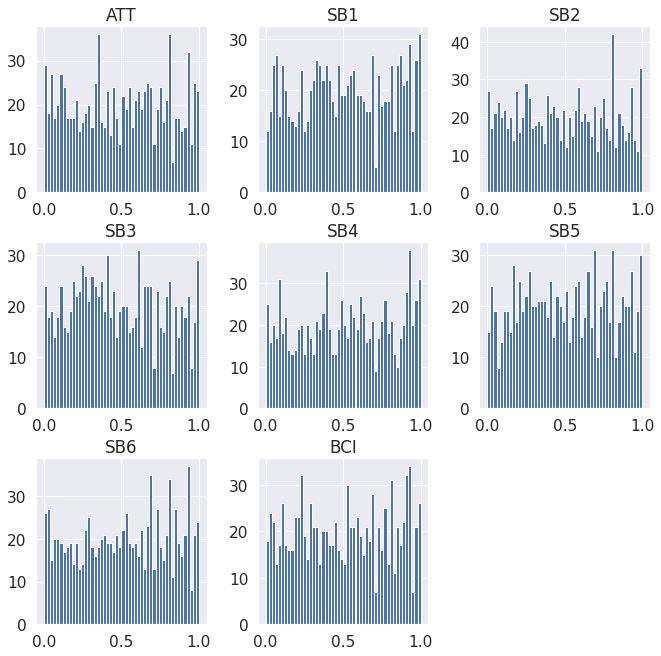

In [30]:
# Plot histograms of the featuers to visualize the data
knowledge.hist(bins=50, figsize = (11,11))
plt.show()

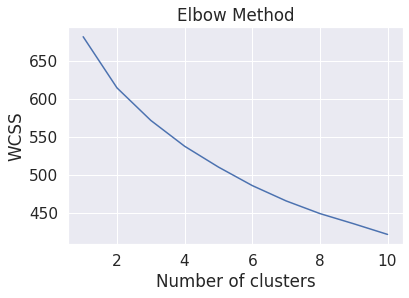

In [31]:
# Perform k-Means Clustering with values of k from 1 to 10 and plot k v/s Within Cluster Sum of Squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=20, random_state=0)
    kmeans.fit(knowledge)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
# K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=400, n_init=20, random_state=0)
kmeans.fit(knowledge)
k_class = kmeans.predict(knowledge)

In [33]:
# Using PCA and filtering 4 principal components for data visualization
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(knowledge)
PDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [34]:
# Add a column 'Class' to the data sets
PDF.loc[:, 'Cluster'] = pd.Series(k_class)
knowledge_class = knowledge.copy()
knowledge_class['Class'] = k_class

In [35]:
# Count of points in each cluster
PDF['Cluster'].value_counts()

0    265
2    250
1    245
3    240
Name: Cluster, dtype: int64

In [36]:
# Assign a color to each cluster
PDF['Color'] = PDF['Cluster'].map({0 : 'red', 1 : 'blue', 2 : 'green' , 3 : 'purple'})

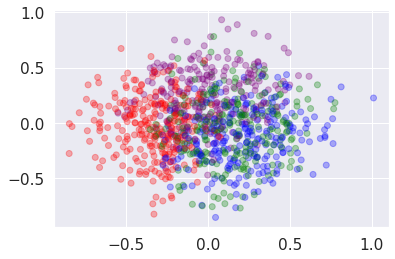

In [37]:
# Plot the first 2 principal components and color by cluster
a1 = PDF['PC1']
a2 = PDF['PC2']
a3 = PDF['PC3']
a4 = PDF['PC4']
c1 = PDF['Color']
plt.scatter(a1, a2, c = c1, alpha=0.3, cmap='viridis')

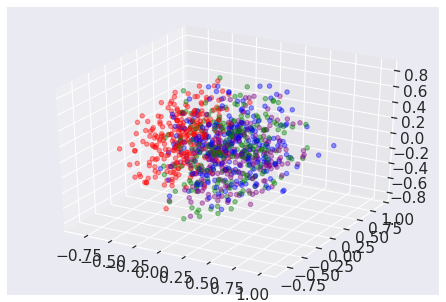

In [38]:
# 3-D plot of the data using 3 principal components
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(a1, a2, a3, alpha = 0.4, c = c1)

In [39]:
knowledge_class.groupby(['Class']).mean()

,ATT,SB1,SB2,SB3,SB4,SB5,SB6,BCI
Class,,,,,,,,
0,0.399434,0.444113,0.357849,0.421132,0.377057,0.529132,0.400151,0.777358
1,0.505918,0.493714,0.786327,0.512571,0.755429,0.519347,0.500653,0.544327
2,0.580160,0.588800,0.236800,0.557440,0.682360,0.517320,0.626840,0.395440
3,0.480917,0.523292,0.600417,0.435125,0.239208,0.457792,0.508167,0.267000


In [40]:
# Slipt the data into train and test data sets
X = knowledge_class.iloc[:, :-1]
Y = knowledge_class.iloc[:, -1]
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Text(0.5, 1.0, 'k v/s Accuracy for KNN')

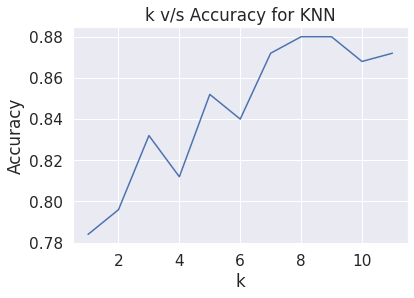

In [41]:
# KNN for various values of k and plot of k v/s accuracy
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors = i).fit(xTrain, yTrain)
    accuracy.append(knn.score(xTest, yTest))

plt.plot(range(1,12), accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy') 
plt.title('k v/s Accuracy for KNN')

In [42]:
# KNN model and evaluation for optimal value of k (8 in this case)
knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1).fit(xTrain, yTrain)
knn_predictions = knn.predict(xTest)
knn_accuracy = knn.score(xTest, yTest)
knn_accuracy

0.88

In [43]:
knn_CM = confusion_matrix(yTest, knn_predictions) # KNN Confusion Matrix
knn_CM

array([[62,  2,  2,  0],
       [ 3, 48,  2,  2],
       [ 5,  5, 59,  0],
       [ 1,  3,  5, 51]])

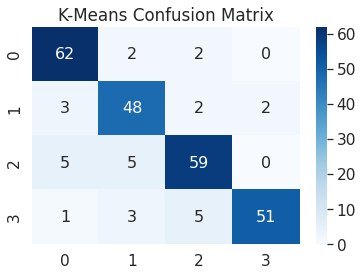

In [44]:
array = knn_CM

df_cm = pd.DataFrame(array, range(4), range(4))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues").set(title='K-Means Confusion Matrix')

plt.show()

In [45]:
# Decision Tree Classifier and evaluation for optimal value of k
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(xTrain, yTrain) 
dtree_predictions = dtree_model.predict(xTest)
dt_accuracy = dtree_model.score(xTest, yTest)
dt_accuracy

0.712

In [46]:
DT_CM = confusion_matrix(yTest, dtree_predictions) # Decision Tree confusion Matrix
DT_CM

array([[54,  2,  4,  6],
       [ 3, 48,  2,  2],
       [22,  2, 45,  0],
       [ 0,  7, 22, 31]])

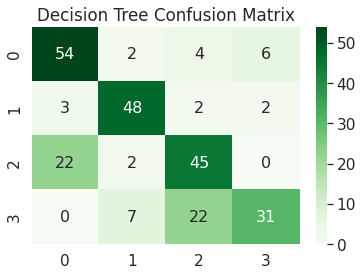

In [47]:
dt_array = DT_CM

dt_cm = pd.DataFrame(dt_array, range(4), range(4))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(dt_cm, annot=True, annot_kws={"size": 16}, cmap="Greens").set(title='Decision Tree Confusion Matrix')

plt.show()

In [48]:
# Gaussian Naive Bayes model and evaluation for optimal value of k
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(xTrain, yTrain)
gnb_predictions = gnb.predict(xTest)
gnb_accuracy = gnb.score(xTest, yTest)
gnb_accuracy

0.888

In [49]:
NB_CM = confusion_matrix(yTest, gnb_predictions) # Naive Bayes confusion Matrix
NB_CM

array([[60,  0,  3,  3],
       [ 1, 52,  1,  1],
       [ 3,  3, 58,  5],
       [ 3,  4,  1, 52]])

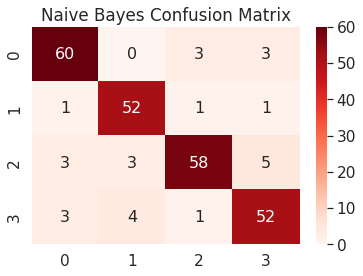

In [50]:
nb_array = NB_CM

nb_cm = pd.DataFrame(nb_array, range(4), range(4))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(nb_cm, annot=True, annot_kws={"size": 16}, cmap="Reds").set(title='Naive Bayes Confusion Matrix')

plt.show()

We conclude that the Naive Bayes classifier performed better than KNN and Decision Tree classifier based on the results of accuracy as can be verified by comparing the confusion matrices.